In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
subm = pd.read_csv('dataset/sample_submission.csv')

In [5]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
train['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [8]:
lens = train.comment_text.str.len()

In [19]:
len_mean, len_std, len_max = lens.mean(), lens.std(), lens.max()

In [21]:
print(len_mean, len_std, len_max)

394.0732213246768 590.7202819048923 5000


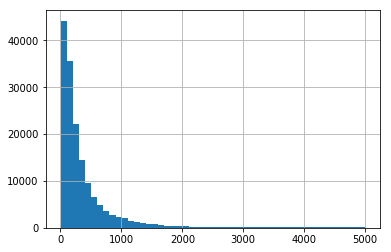

In [26]:
lens.hist(bins=50);

In [27]:
labels_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [28]:
train['none'] = 1 - train[labels_cols].max(axis=1)

In [29]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [31]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
len(train), len(test)

(159571, 153164)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
none             159571 non-null int64
dtypes: int64(7), object(2)
memory usage: 11.0+ MB


In [50]:
# filling null values
comment = 'comment_text'
train[comment].fillna('unknown', inplace=True)
test[comment].fillna('unknown', inplace=True)

In [51]:
# bulilding the model
import re, string

In [52]:
# cleaning code of insignificant symbols
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’""])')

In [54]:
def tokenize(s): return re_tok.sub(r' \1',s).split()

In [56]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
                     min_df=3, max_df=0.9, strip_accents='unicode',
                     use_idf=1, smooth_idf=1, sublinear_tf=1)

In [57]:
trn_term_doc = vec.fit_transform(train[comment])

In [58]:
test_term_doc = vec.transform(test[comment])

In [63]:
trn_term_doc, test_term_doc

(<159571x435399 sparse matrix of type '<class 'numpy.float64'>'
 	with 17017600 stored elements in Compressed Sparse Row format>,
 <153164x435399 sparse matrix of type '<class 'numpy.float64'>'
 	with 14036758 stored elements in Compressed Sparse Row format>)

In [64]:
# naive bayes feature equation
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1)/((y==y_i).sum()+1)

In [65]:
x = trn_term_doc
x_test = test_term_doc

In [66]:
def get_model(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    
    return m.fit(x_nb, y), r

In [69]:
preds = np.zeros((len(test), len(labels_cols)))

In [71]:
for i, j in enumerate(labels_cols):
    print('fit', j)
    m, r = get_model(train[j])
    preds[:,i] = m.predict_proba(x_test.multiply(r))[:,1]

fit toxic
fit severe_toxic
fit obscene
fit threat
fit insult
fit identity_hate


In [73]:
submid = pd.DataFrame({'id': subm['id']})

In [74]:
submission = pd.concat([submid, pd.DataFrame(preds,
                                             columns=labels_cols)],
                      axis=1)

In [75]:
submission.to_csv('submission.csv', index=False)